# Pytorch:-

Pytorch a Python-based scientific computing package targeted at two sets of audiences:

* A replacement for NumPy to use the power of GPUs
* a deep learning research platform that provides maximum flexibility and speed

### Tensors

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

PyTorch provides functions similar to numpy to create tensors:-

In [3]:
import torch

In [4]:
x = torch.empty(2, 3) # Construct a 5x3 matrix, uninitialized
print(x)
print(x.size()) # torch.Size is a tuple, so it supports all tuple operations

tensor([[0.0000e+00, 8.5899e+09, 0.0000e+00],
        [8.5899e+09, 1.1557e+27, 2.0507e-10]])
torch.Size([2, 3])


In [5]:
x = torch.rand(2, 3) # Construct a randomly initialized matrix
print(x)

tensor([[0.6840, 0.6399, 0.2165],
        [0.2138, 0.9944, 0.8523]])


In [6]:
x = torch.zeros(5, 3, dtype=torch.long) # Construct a matrix filled zeros and of dtype long
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [7]:
x = torch.tensor([5.5, 3]) # Construct a tensor directly from data
print(x)

tensor([5.5000, 3.0000])


In [8]:
# create a tensor based on an existing tensor. These methods will reuse properties of the input tensor, e.g. dtype, unless new values are provided by user
x = x.new_ones(2, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 1.1268, -0.0866,  0.2110],
        [-0.5446, -0.7028,  0.9314]])


Slicing also works the same way as in numpy arrays. See for an example below:-

In [14]:
# Every row, only the last column
print(x[:, -1])

# First row, all columns
print(x[:1, :])

# Lower right most corner
print(x[-1:, -1:])
 

tensor([0.2110, 0.9314])
tensor([[ 1.1268, -0.0866,  0.2110]])
tensor([[0.9314]])


A slight caveat here is reshape operation, which is a bit different from numpy. It turns out Pytorch decided to come up with a new name that no one else uses, they call it .view()

In [9]:
y = x.view([1,6])
print(y)

tensor([[ 1.1268, -0.0866,  0.2110, -0.5446, -0.7028,  0.9314]])


### Operations:-

There are multiple syntaxes for operations. In the following example, we will take a look at the addition operation.

In [11]:
y = torch.rand(2, 3)
print(x + y)

print(torch.add(x, y))

result = torch.empty(2, 3)
torch.add(x, y, out=result) # Providing an output tensor as argument
print(result)

y.add_(x) # In-place addition
print(y)

tensor([[ 2.1253,  0.5229,  0.6215],
        [-0.2157, -0.6249,  0.9333]])
tensor([[ 2.1253,  0.5229,  0.6215],
        [-0.2157, -0.6249,  0.9333]])
tensor([[ 2.1253,  0.5229,  0.6215],
        [-0.2157, -0.6249,  0.9333]])
tensor([[ 2.1253,  0.5229,  0.6215],
        [-0.2157, -0.6249,  0.9333]])


In [16]:
# Compute cross product
t1 = torch.randn(2, 3)
t2 = torch.randn(2, 3)
t1.cross(t2)

tensor([[-0.4678, -0.7703, -1.1082],
        [-0.0742, -0.9053, -0.3361]])

In [17]:
# Compute matrix product
t = (torch.Tensor([[2, 4], [5, 10]]).mm(torch.Tensor([[10], [20]])))
t

tensor([[100.],
        [250.]])

In [18]:
# Elementwise multiplication
t = torch.Tensor([[1, 2], [3, 4]])
t.mul(t)

tensor([[ 1.,  4.],
        [ 9., 16.]])

**Read later:**


  100+ Tensor operations, including transposing, indexing,
  mathematical operations, linear algebra, random numbers, etc.,
  are described here <https://pytorch.org/docs/torch>.

### NumPy Bridge

Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory
locations, and changing one will change the other.

In [19]:
a = torch.ones(5)
print(a)
b = a.numpy() # Converts torch tensor to numpy array
print(b)

a.add_(1)
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [20]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a) # Converts numpy array to torch tensor
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


### Neural Networks in Pytorch:-

The torch.nn import gives us access to some helpful neural network things, such as various neural network layer types (things like regular fully-connected layers, convolutional layers (for imagery), recurrent layers...etc). 

The torch.nn.functional area specifically gives us access to some handy functions that we might not want to write ourselves. We will be using the relu or "rectified linear" activation function for our neurons. Instead of writing all of the code for these things, we can just import them, since these are things everyone will be needing in their deep learning code.

For now, in the course we have only spoken about feed forward neural networks, so we will be talking about those:-

In [22]:
import torch.nn as nn
import torch.nn.functional as F

In [23]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

net = Net()
print(net)

Net()


You might see above we are using **super** method to inherit from **nn.module** class:-

Typically, when you inherit from a parent class, that init method doesn't actually get run. This is how we can run that init method of the parent class, which can sometimes be required...because we actually want to initialize things! For example, let's show some classes:

In [24]:
class a:
    '''Will be a parent class'''
    def __init__(self):
        print("initializing a")

class b(a):
    '''Inherits from a, but does not run a's init method '''
    def __init__(self):
        print("initializing b")

class c(a):
    '''Inhereits from a, but does run a's init method'''
    def __init__(self):
        super().__init__()
        print("initializing c")

b_ob = b()

initializing b


Notice how our b_ob doesn't have the a class init method run. If we create a c_ob from the c class though:

In [26]:
c_ob = c()

initializing a
initializing c


Now, we will try to learn about how to do a basic neural network in pytorch, so we'll use torchvision here, to load the MNIST dataset, which is a image-based dataset showing handwritten digits from 0-9, and your job is to write a neural network to classify them.

This dataset is already scaled and pre-processing has already been done. So we will be focusing on how to build neural network with pytorch

MNIST data is an image data with dimension 28*28

In [27]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([ transforms.ToTensor()]))

test = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([ transforms.ToTensor()]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



/Users/saurabhbudholiya/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


We usually try to pass the data to neural network in batches, because its very computationally expensive to pass the data at once and train the network, second reason being we want the neural network to generalize the pattern

The below is an inbuilt functionality of Pytorch to divide the data into batches given a batch size

For traning data, we generally want to randomly shuffle the input data as much as possible to hopefully not have any patterns in the data that might throw the network off.

For example, if you fed the machine a bunch of images of zeros, the machine would learn to classify everything as zero. Then you'd start feeding it ones, and the machine would figure out pretty quick to classify everything as ones...and so on. Whenever you stop, the network would probably just classify everything as the last thing you trained on. If you shuffle the data, your network is much more likely to figure out what's what.

In [30]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [39]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [32]:
X, y = data[0][0], data[1][0]

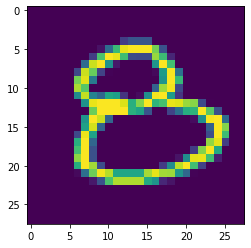

In [40]:
import matplotlib.pyplot as plt #see how handwritten digits look like:-

plt.imshow(data[0][0].view(28,28))
plt.show()

Now, let us define our layers and activation functions for our neural network:-
    
So, our first layer takes in 28x28, because our images are 28x28 images of hand-drawn digits. A basic neural network is going to expect to have a flattened array, so not a 28x28, but instead a 1x784.

We need to decide the number of units in hidden layer, which is an hyperparameter to work with. For now, we choose that as 64

The final output layer has 10 neurons, because we have 10 classes( digits from **0 to 9**)

We use relu activation function and then use softmax at the end to arrive at the final scores

In [44]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

In [46]:
net = Net()

We will have to specify the loss function and our optimizer.

In [48]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

Let us write code to train the neural network now. A few terminologies:-

**Epoch :-** One full pass over the entire data

it's important to do a net.zero_grad() for every step, otherwise these gradients will add up for every pass, and then we'll be re-optimizing for previous gradients that we already optimized for.

See below, how elegantly the code for training is with Pytorch. You don't have to implement any differentation, nor write any weight update equations:-

In [52]:
for epoch in range(5):
    for data in trainset: 
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = loss_function(output, y)
        loss.backward()  #backpropgation
        optimizer.step()  # update weights
    print(loss)  


tensor(0.3209, grad_fn=<NllLossBackward>)
tensor(0.2359, grad_fn=<NllLossBackward>)
tensor(0.0882, grad_fn=<NllLossBackward>)
tensor(0.0565, grad_fn=<NllLossBackward>)
tensor(0.1774, grad_fn=<NllLossBackward>)


Let us test our model now:-

output will return an array of softmax probabilities, we have to pick the index which has the highest probability and compare that to actual labels

In [55]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))

        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.907


The accuracy is pretty good:-

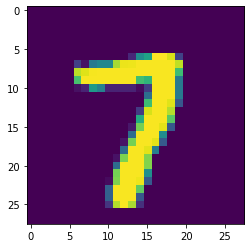

In [56]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28,28))
plt.show()

In [57]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(7)


**This is just an introduction to Pytorch, as we go along the course...you will learn about training neural networks, and then we will dive to more complicated applications:-**

There are plenty of resources online and youtube videos to dive deep into pytorch. Some of them are mentioned below:-

 https://github.com/jcjohnson/pytorch-examples, <br>
 https://pytorch.org/tutorials/beginner/pytorch_with_examples.html <br>
 https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627 <br>
 https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
